In [1]:
import numpy as np
import matplotlib.pylab as plt
import re
from tables import open_file
from statistics import median, mode
from scipy.optimize import curve_fit, minimize

def run_file(file_name):
    file_path = '/Users/cosmos2299/documents/data/'
    l = open_file(file_path + file_name)
    list(l)
    
    atstamp = l.root.absolute_timestamp[150:].flatten()
    r_0 = l.root.rising_0[150:].flatten()
    r_1 = l.root.rising_1[150:].flatten()
    r_2 = l.root.rising_2[150:].flatten()
    r_3 = l.root.rising_3[150:].flatten()
    f_0 = l.root.falling_0[150:].flatten()
    f_1 = l.root.falling_1[150:].flatten()
    f_2 = l.root.falling_3[150:].flatten()
    f_3 = l.root.falling_3[150:].flatten()
    
    p_jumps = ((atstamp.size - atstamp[(atstamp < 1e11) & (atstamp > -1e7)].size)/
                     atstamp.size) * 100
    print('percentage of high jumps in the file -', p_jumps)
    
    return atstamp, r_0, r_1, r_2, r_3, f_0, f_1, f_2, f_3, p_jumps, file_name, file_path

In [2]:
(atstamp, r_0, r_1, r_2, r_3, f_0, f_1, f_2, f_3, p_jumps, file_name, file_path
) = run_file('20181205_092552_UTC_SDOM1_FLASH_SANTACLAUS_P1_blue_both_5000Hz_20V_60s_18339114715.hld_up.hdf5')

percentage of high jumps in the file - 0.0


In [3]:
def P_S_used():
    POCAM_re = re.compile('P[1-2]')
    SDOM_re = re.compile('SDOM[1-5]')
    frequency_re = re.compile('[0-9][0-9][0-9][0-9]Hz')
    voltage_re = re.compile('[0-9][0-9]V')
    flash_time_re = re.compile('[0-9][0-9]s')
    LED_re = re.compile('P[0-9]_[a-z]')
    PMT_re = re.compile('hld_[a-z]')

    SDOM_num = SDOM_re.findall(file_name)
    POCAM_num = POCAM_re.findall(file_name)
    frequency = frequency_re.findall(file_name)
    voltage = voltage_re.findall(file_name)
    flash_time = flash_time_re.findall(file_name)
    LED = LED_re.findall(file_name)
    PMT = PMT_re.findall(file_name)
    
    if PMT == ['hld_d']:
        PMT = 'down'
    else:
        PMT = 'up'
    
    if LED == ['P1_b']:
        LED = 'blue'
    if LED == ['P1_v']:
        LED = 'violet'
    
    if LED == ['P2_b']:
        LED = 'blue'
    if LED == ['P2_v']:
        LED = 'violet'
        
    graph_title = [POCAM_num, SDOM_num,PMT, LED, voltage]
    values = ','.join(str(v) for v in graph_title)
    
    return graph_title, values, POCAM_num, SDOM_num, PMT, LED, voltage

In [4]:
graph_title, values, POCAM_num, SDOM_num, PMT, LED, voltage = P_S_used()

In [5]:
def abs_time_graph(graph_title):
    plt.figure(figsize=(10,9))
    plt.title(graph_title, fontsize = 22)
    plt.ylabel('absolute_timestamps(ns)', fontsize = 19)
    plt.xlabel('index', fontsize = 19)
    plt.plot(atstamp, '.')
    plt.savefig(file_path + '/graphs/' + values + 'high_jumps.jpeg', dpi = 200)

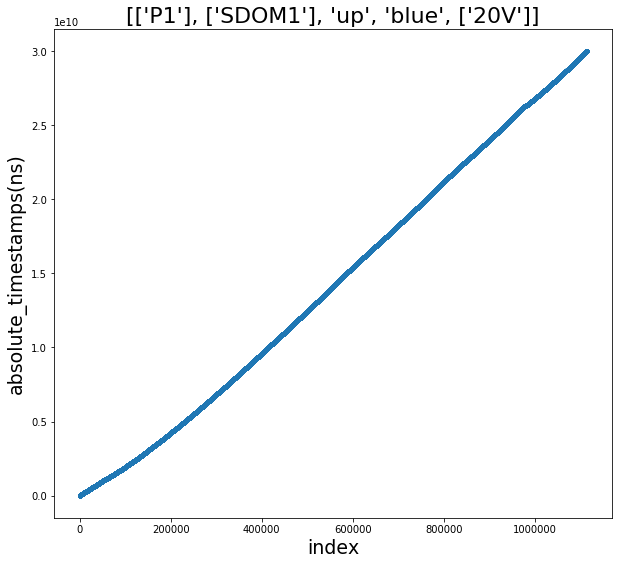

In [6]:
abs_time_graph(graph_title)

In [7]:
def clean_l_jumps():
    abs_elim = atstamp[(atstamp < 1e11) & (atstamp > -1e7)]
    rising_0_elim = r_0[(atstamp < 1e11) & (atstamp > -1e7)]
    rising_1_elim = r_1[(atstamp < 1e11) & (atstamp > -1e7)]
    rising_2_elim = r_2[(atstamp < 1e11) & (atstamp > -1e7)]
    rising_3_elim = r_3[(atstamp < 1e11) & (atstamp > -1e7)]
    falling_0_elim = f_0[(atstamp < 1e11) & (atstamp > -1e7)]
    falling_1_elim = f_1[(atstamp < 1e11) & (atstamp > -1e7)]
    falling_2_elim = f_2[(atstamp < 1e11) & (atstamp > -1e7)]
    falling_3_elim = f_3[(atstamp < 1e11) & (atstamp > -1e7)]
    
    plt.figure(figsize=(10,9))
    plt.title(graph_title, fontsize = 22)
    plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
    plt.xlabel('index', fontsize = 19)
    plt.plot(abs_elim, '.')
    plt.savefig(file_path + '/graphs/' + values + 'high_jumps_cleaned.jpeg', dpi = 200)
    plt.show()
    
    plt.figure(figsize=(10,9))
    plt.title(values + ' Negative Timestamps', fontsize = 18)
    plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
    plt.plot(abs_elim, '.')
    plt.ylim(-0.1e7, 0)
    plt.savefig(file_path + '/graphs/' + values + 'negative_values.jpeg', dpi = 200)
    plt.show()
    
    return (abs_elim, rising_0_elim, rising_1_elim, rising_2_elim, rising_3_elim,
            falling_0_elim, falling_1_elim, falling_2_elim, falling_3_elim)

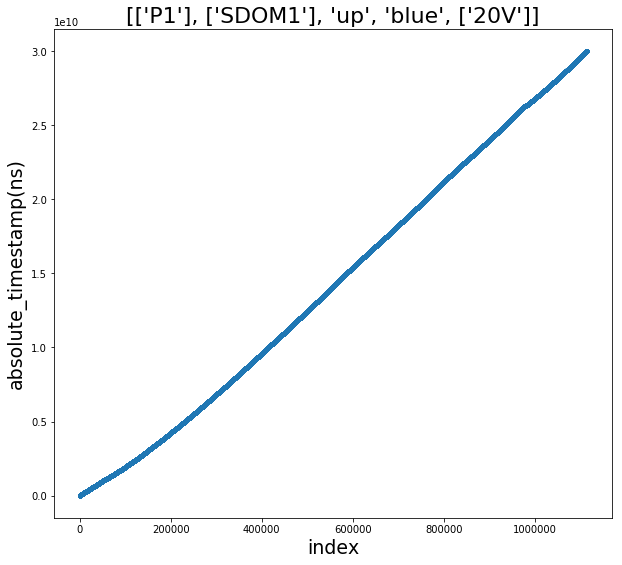

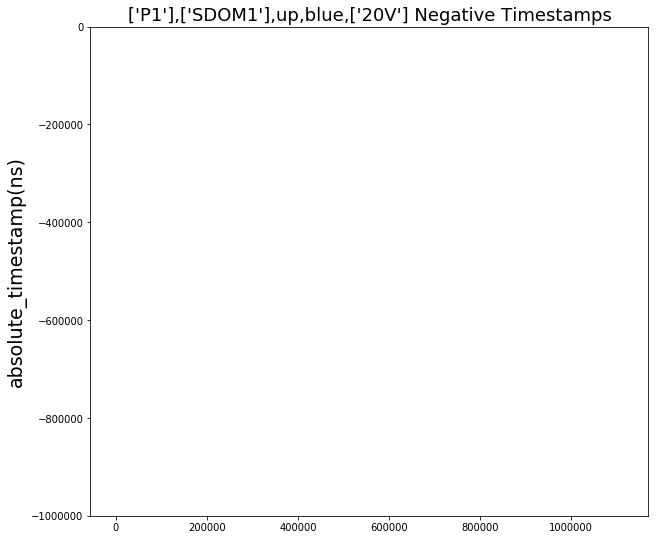

In [8]:
(abs_elim, rising_0_elim, rising_1_elim, rising_2_elim, rising_3_elim,
            falling_0_elim, falling_1_elim, falling_2_elim, falling_3_elim) = clean_l_jumps()

In [9]:
def abs_diff_graph():
    
    abs_elim_diff = abs_elim[1:] - abs_elim[:-1]
    
    abs_elim_bool = abs_elim[:-1][abs_elim_diff < 0]
    
    plt.figure(figsize=(10,9))
    plt.title(graph_title, fontsize = 22)
    plt.ylabel('absolute_timestamp difference(ns)', fontsize = 19)
    plt.xlabel('index', fontsize = 19)
    #plt.ylim(-10000, 0)
    plt.plot(abs_elim_diff, '.')
    plt.savefig(file_path + '/graphs/' + values + 'timestamp_differences.jpeg', dpi = 200)
    plt.show()
    
    if abs_elim_bool.size != 0:
        plt.figure(figsize=(10,9))
        plt.ylabel('absolute_timestamp(ns)', fontsize = 19)
        plt.xlabel('index', fontsize = 19)
        plt.title(values + ' Jumps in Timestamps', fontsize = 16)
        plt.plot(abs_elim[abs_elim_diff.argmin()-10:abs_elim_diff.argmin()+10], '.')
        plt.savefig(file_path + '/graphs/' + values + 'small_jumps.jpeg', dpi = 200)
        plt.show()
    
    return (abs_elim, rising_0_elim, rising_1_elim, rising_2_elim, rising_3_elim, 
            falling_0_elim, falling_1_elim, falling_2_elim, falling_3_elim)

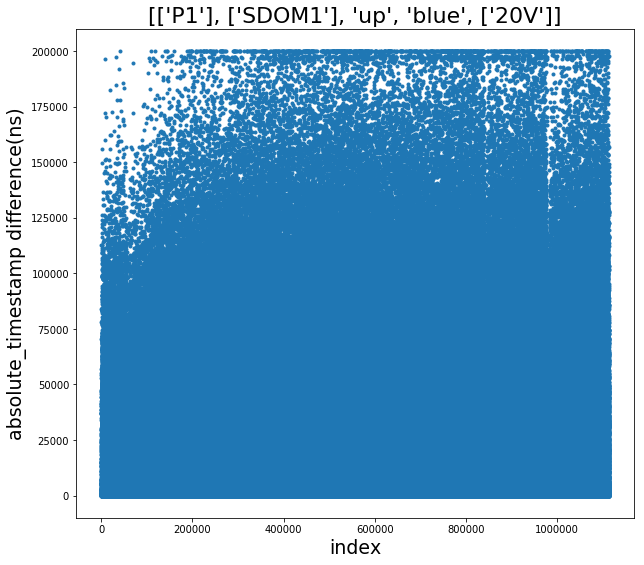

In [10]:
(abs_elim_2, rising_0_elim_2,  rising_1_elim_2,  rising_2_elim_2,  rising_3_elim_2,
 falling_0_elim_2, falling_1_elim_2, falling_2_elim_2, falling_3_elim_2) = abs_diff_graph()

In [11]:
def clean_s_jumps():
    abs_elim_diff_2 = abs_elim_2[1:] - abs_elim_2[:-1]

    s_jump_index = []
    s_jump_1 = []
    s_jump_2 = []
    list_1 = np.array([])

    for r in range(0, abs_elim_diff_2.size):
        if abs_elim_diff_2[r] < 0:
            s_jump_index.append(r)
            s_jump_1.append(abs_elim_diff_2[r])
            #print(s_jump_index)

    for t in range(0, len(s_jump_index)):
        #print("index",s_jump_index[t])
        #print("index value", abs_elim_diff_2[s_jump_index[t]])
    
        select = abs_elim_diff_2[s_jump_index[t] - 10:s_jump_index[t]]
        #print("select", select)
        x = s_jump_index[t] - (10 - (np.abs(select+abs_elim_diff_2[s_jump_index[t]])).argmin())
        #print("argmin", np.abs(select+abs_elim_diff_2[s_jump_index[t]]).argmin())
        #print(x)
    
        jump_length = s_jump_index[t] - x
    
        #print("jump length", jump_length)
    
       # print("abs_elim_2.size",abs_elim_2.size)
        if jump_length == 1:
            list_1 = np.append(list_1, [x+1])
        if jump_length == 2:
              list_1 = np.append(list_1,[x+1, x+2])
        if jump_length == 3:
             list_1 = np.append(list_1,[x+1, x+2, x+3])
        if jump_length == 4:
             list_1 = np.append(list_1,[x+1, x+2, x+3, x+4])
        if jump_length == 5:
              list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5])
        if jump_length == 6:
             list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6])
        if jump_length == 7:
              list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7])
        if jump_length == 8:
              list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8])
        if jump_length == 9:
              list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9])
        if jump_length == 10:
              list_1 = np.append(list_1,[x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9, x+10])
    #print("abs_elim_2.size",abs_elim_2.size)
    
    print(list_1)
    
    abs_elim_3 = np.delete(abs_elim_2, list_1)
    abs_elim_diff_3 = abs_elim_3[1:] - abs_elim_3[:-1]
    rising_0_elim_3 = np.delete(rising_0_elim_2, list_1)
    rising_1_elim_3 = np.delete(rising_1_elim_2, list_1)
    rising_2_elim_3 = np.delete(rising_2_elim_2, list_1)
    rising_3_elim_3 = np.delete(rising_3_elim_2, list_1)
    falling_0_elim_3 = np.delete(falling_0_elim_2, list_1)
    falling_1_elim_3 = np.delete(falling_1_elim_2, list_1)
    falling_2_elim_3 = np.delete(falling_2_elim_2, list_1)
    falling_3_elim_3 = np.delete(falling_3_elim_2, list_1)
   
    plt.figure(figsize=(10,9))
    plt.title(graph_title, fontsize = 22)
    plt.ylabel('absolute_timestamp difference(ns)', fontsize = 19)
    plt.xlabel('index', fontsize = 19)
    #plt.ylim(-10000, 0)
    plt.plot(abs_elim_diff_3, '.')
    plt.savefig(file_path + '/graphs/' + values + 'small_jumps_cleaned.jpeg', dpi = 200)
    plt.show()
    
    return (abs_elim_3,rising_0_elim_3,rising_1_elim_3,rising_2_elim_3,rising_3_elim_3,
            falling_0_elim_3,falling_1_elim_3,falling_2_elim_3,falling_3_elim_3)

[]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/ana

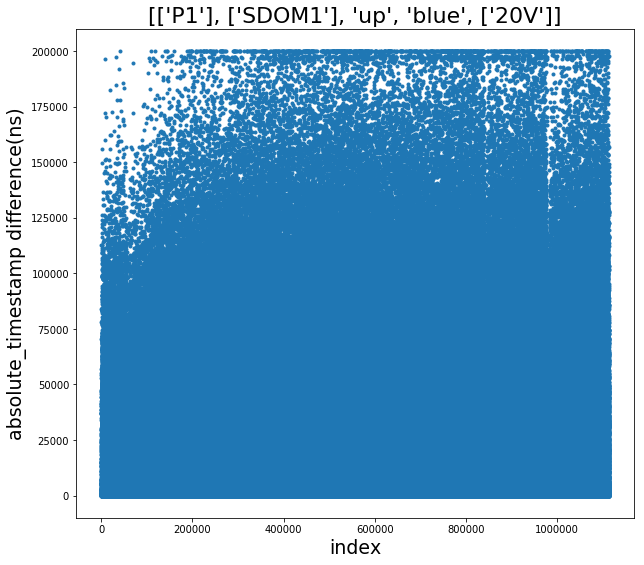

In [12]:
(abs_elim_3a,rising_0_elim_3a,rising_1_elim_3a,rising_2_elim_3a,rising_3_elim_3a,
            falling_0_elim_3a,falling_1_elim_3a,falling_2_elim_3a,falling_3_elim_3a) = clean_s_jumps()

In [13]:
def clean_fall_rise():
    boolean = ((falling_0_elim_3a != 0) & ((falling_1_elim_3a - rising_1_elim_3a) >= 0) & 
                ((falling_2_elim_3a - rising_2_elim_3a) >= 0) & ((falling_3_elim_3a - rising_3_elim_3a) >= 0))

    abs_elim_3b = abs_elim_3a[boolean]
    rising_0_elim_3b = rising_0_elim_3a[boolean]
    rising_1_elim_3b = rising_1_elim_3a[boolean]
    rising_2_elim_3b = rising_2_elim_3a[boolean]
    rising_3_elim_3b = rising_3_elim_3a[boolean] 
    falling_0_elim_3b = falling_0_elim_3a[boolean] 
    falling_1_elim_3b = falling_1_elim_3a[boolean]
    falling_2_elim_3b = falling_2_elim_3a[boolean]
    falling_3_elim_3b = falling_3_elim_3a[boolean]
        
    delete = []
    for i in range(0, abs_elim_3b.size):
        if ((falling_1_elim_3b[i] != 0 and rising_1_elim_3b[i] == 0)
            or (falling_2_elim_3b[i] != 0 and rising_2_elim_3b[i] == 0)
            or (falling_3_elim_3b[i] != 0 and rising_3_elim_3b[i] == 0)
            ):
            delete.append(i)
        
    abs_elim_3 = np.delete(abs_elim_3b, delete)
    rising_0_elim_3 = np.delete(rising_0_elim_3b, delete)
    rising_1_elim_3 = np.delete(rising_1_elim_3b, delete)
    rising_2_elim_3 = np.delete(rising_2_elim_3b, delete)
    rising_3_elim_3 = np.delete(rising_3_elim_3b, delete)
    falling_0_elim_3 = np.delete(falling_0_elim_3b, delete)
    falling_1_elim_3 = np.delete(falling_1_elim_3b, delete)
    falling_2_elim_3 = np.delete(falling_2_elim_3b, delete)
    falling_3_elim_3 = np.delete(falling_3_elim_3b, delete) 
    
    return (abs_elim_3,rising_0_elim_3,rising_1_elim_3,rising_2_elim_3,rising_3_elim_3,
            falling_0_elim_3,falling_1_elim_3,falling_2_elim_3,falling_3_elim_3)

In [14]:
(abs_elim_3,rising_0_elim_3,rising_1_elim_3,rising_2_elim_3,rising_3_elim_3,
            falling_0_elim_3,falling_1_elim_3,falling_2_elim_3,falling_3_elim_3) = clean_fall_rise()

In [15]:
def estimate_residuals(rising_a_elim_3, lspace_lower, lspace_upper, lspace, lower_bound, upper_bound):
    
    t_threshold = abs_elim_3[rising_a_elim_3 > 0] + rising_a_elim_3[rising_a_elim_3 > 0]
    t_diff = t_threshold[1:] - t_threshold[:-1]
    events_in_peak = t_threshold[:-1][(t_diff[:] > lower_bound) & (t_diff[:] < upper_bound)] #selecting events in peak
    
    _ = plt.hist(t_diff, np.linspace(lspace_lower,lspace_upper, lspace), log = True)

    if POCAM_num ==['P1']:
        estimate_peak = 200100.71     #for POCAM_1
    if POCAM_num == ['P2']:
        estimate_peak = 200100.33     #for POCAM_2
    
    estimate_residual = events_in_peak%estimate_peak
    
    plt.figure(figsize=(10,9))
    plt.plot(events_in_peak, estimate_residual, '.')
    plt.title(values + '-time residuals of threshold 1', fontsize = 19)
    plt.xlabel('timestamps', fontsize = 16)
    plt.ylabel('time residuals', fontsize = 16)
    
    return events_in_peak, estimate_residual, t_threshold, estimate_peak

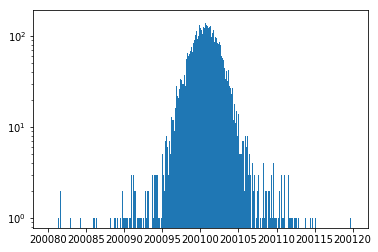

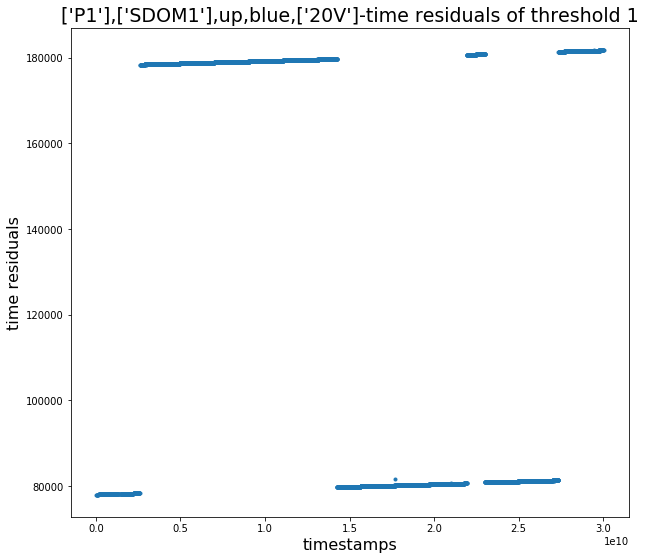

In [23]:
(events_in_peak, estimate_residual, 
             t_threshold, estimate_peak) = estimate_residuals(rising_1_elim_3, 
                                                              200080, 200120, 400, 
                                                              200096, 200105,)

In [27]:
def res(greater_than, med_bound):
    
    est_res_diff = abs(estimate_residual[1:] - estimate_residual[:-1])
    
    #selecting indices where the jump occured
    jump_index = []
    for r in range(0, est_res_diff.size):
        if est_res_diff[r] > greater_than:
            jump_index.append(r)

    peak_1 = [] 
    t_res_all = np.array([])
    t_res_all_all = np.array([])
    for p in range(0, len(jump_index)):
        print("index_p", p)
        
        #selecting runs - only POCAM events
        if p == 0 and jump_index[p] != 0:
            v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[0]) & 
                                  (events_in_peak[:] < events_in_peak[jump_index[p]+1])]
            
            b = events_in_peak[jump_index[p]+1]  #b is the upper bound when considering all events(see run_time)
            if v.size == 0:
                continue
            plt.figure(figsize=(10,9))            #plotting time residual graph for individual runs
            plt.plot(v%estimate_peak, '.')
            plt.ylabel('time_residual')
            plt.show()
            
        elif p == len(jump_index) - 1:
            v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[jump_index[p]+1]) & 
                                  (events_in_peak[:] < events_in_peak[events_in_peak.size - 1])]
            b = events_in_peak[events_in_peak.size - 1]
            if v.size == 0:
                continue
            plt.figure(figsize=(10,9))
            plt.plot(v%estimate_peak, '.')        
            plt.ylabel('time_residual')
            plt.show()
            
        else:    
            v = events_in_peak[:][(events_in_peak[:] >= events_in_peak[jump_index[p]+1]) & 
                                  (events_in_peak[:] < events_in_peak[jump_index[p+1]+1])]
            b = events_in_peak[jump_index[p+1]+1]
            if v.size == 0:
                continue
            plt.figure(figsize=(10,9))
            plt.plot(v%estimate_peak, '.')
            plt.ylabel('time_residual')
            plt.show()
    
        a = min(v) #a is the lower bound when considering all the events(see run_time)

        #selecting runs when all events are considered
        run_time = abs_elim_3[(abs_elim_3 >= a) & (abs_elim_3 < b)]
    
        #Minimizer
        tmin = v[0]
        tmax = v[v.size-1]
        def dfunc2(delta_t):
            x = events_in_peak
            tres = x%delta_t
            selection = (events_in_peak>tmin)*(events_in_peak<tmax)
            return np.sum((tres[selection]-tres[selection].mean())**2)
        
        from scipy.optimize import minimize
        m = minimize(dfunc2, [200100.], method='Powell')
        print(m)
        print(m.x)
        gaus_peak = m.x
        time_res = v%gaus_peak
        time_res_all = run_time%gaus_peak
        print('time_res length', time_res.size)
    
        #Gaussian fit
        med = median(time_res)                    
        med_all = median(time_res_all)
        peak = time_res[(time_res >= med - med_bound) & (time_res <= med + med_bound)]
        peak_all = time_res_all[(time_res_all >= med_all - med_bound) & (time_res_all <= med_all + med_bound)]
    
        def gaussian(x, mean, amplitude, standard_deviation):
            return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

        bins = np.linspace(med-med_bound, med + med_bound, 11)
        bins_all = np.linspace(med-med_bound, med + med_bound, 11)
        data_entries_1, bins_1, _ = plt.hist(peak, bins, alpha = 0.1)
        data_entries_1_all, bins_1_all, _ = plt.hist(peak_all, bins_all, alpha = 0.1)
    
        data = peak
        data_all = peak_all
        bincenters = ((bins[:-1]+bins[1:])/2)
        bincenters_all = ((bins_all[:-1]+bins_all[1:])/2)
    
        from scipy.optimize import curve_fit
        data_entries = data_entries_1
        popt, pcov = curve_fit(gaussian, xdata = bincenters, 
                                ydata = data_entries,  
                                absolute_sigma = True, 
                                p0 = (med, 10, 5),
                                sigma = np.sqrt(data_entries))
        data_entries_all = data_entries_1_all
    
        popt_all, pcov_all = curve_fit(gaussian, xdata = bincenters_all, 
                                        ydata = data_entries_all,  
                                        absolute_sigma = True, 
                                        p0 = (med, 10, 5),
                                        sigma = np.sqrt(data_entries_all))
    
        time_res_sub = time_res - popt[0]
        time_res_sub_all = time_res_all - popt_all[0]
    
        peak_1.append(time_res_sub_all) #peak_1 is for function CheckPeak

        print(popt)
        print(popt_all)
        t_res_all =np.append(t_res_all, time_res_sub)
        t_res_all_all =np.append(t_res_all_all, time_res_sub_all)
            
    plt.figure(figsize=(10,9))
    n, bins, patches = plt.hist(t_res_all, 140, log = True)
    plt.title(values + '-time residuals of threshold 1', fontsize = 19)
    plt.xlabel('time_ns', fontsize = 16)
    plt.ylabel('bincount', fontsize = 16)
    plt.axvline(color = 'r')
        
    plt.figure(figsize=(10,9))
    n, bins, patches = plt.hist(t_res_all_all, np.linspace(-100, 200, 480), log = True)
    #n, bins, patches = plt.hist(t_res_all_all, 300, log = False)
    plt.title(values + '-time residuals of threshold 1', fontsize = 19)
    plt.xlabel('time_ns', fontsize = 16)
    plt.ylabel('bincount', fontsize = 16)
    #plt.xlim(-20, 20)
    plt.axvline(color = 'r')
        
    num_events = t_res_all_all[(t_res_all_all > -10) & (t_res_all_all < 10)]
    return num_events.size, est_res_diff, peak_1

index_p 0


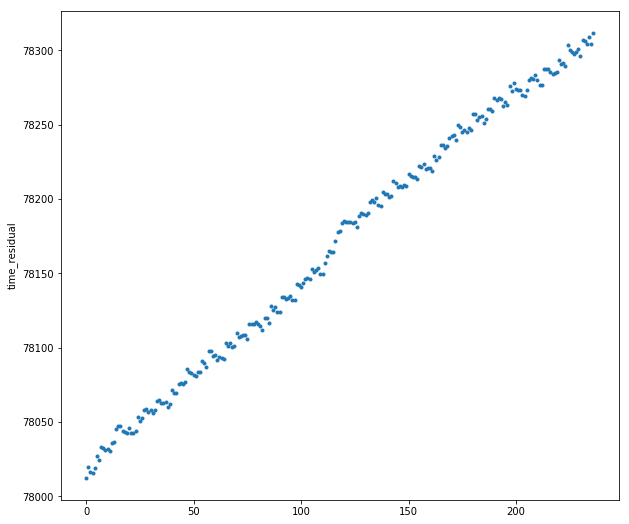

   direc: array([[1.]])
     fun: 2307.3192250973652
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.73285012)
200100.73285011886
time_res length 237
[7.80095147e+04 1.00000000e+01 5.00000000e+00]
[7.80095147e+04 1.00000000e+01 5.00000000e+00]
index_p 1


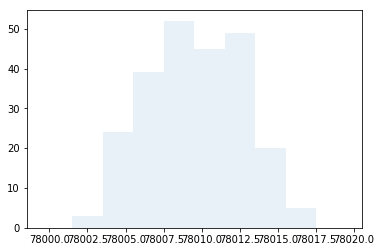

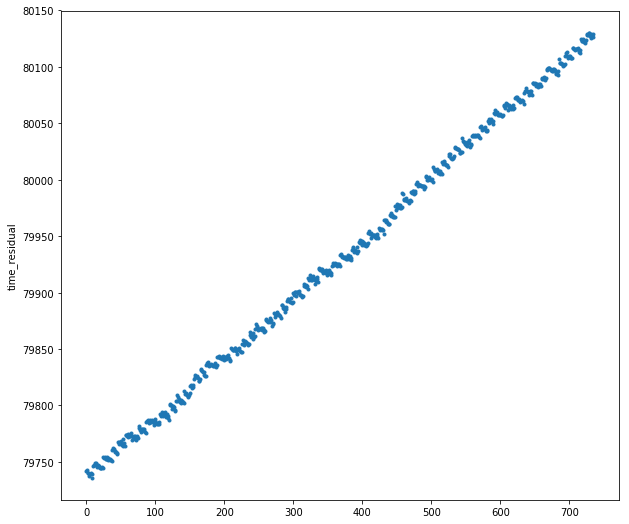

   direc: array([[1.]])
     fun: 7025.896062292305
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
  status: 0
 success: True
       x: array(200100.73279938)
200100.73279938463
time_res length 736
[7.81139466e+04 1.00000000e+01 5.00000000e+00]
[7.81139466e+04 1.00000000e+01 5.00000000e+00]
index_p 2


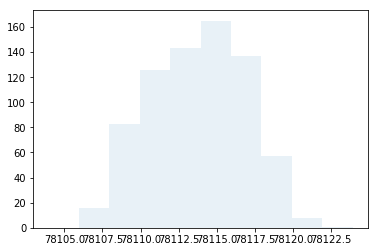

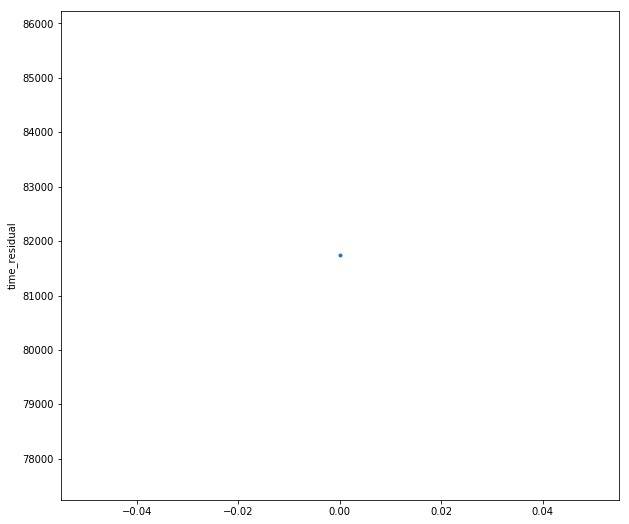

   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.15658465e+05 1.00000000e+01 5.00000000e+00]
[1.15658465e+05 1.00000000e+01 5.00000000e+00]
index_p 3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice.


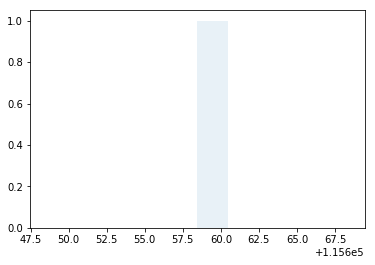

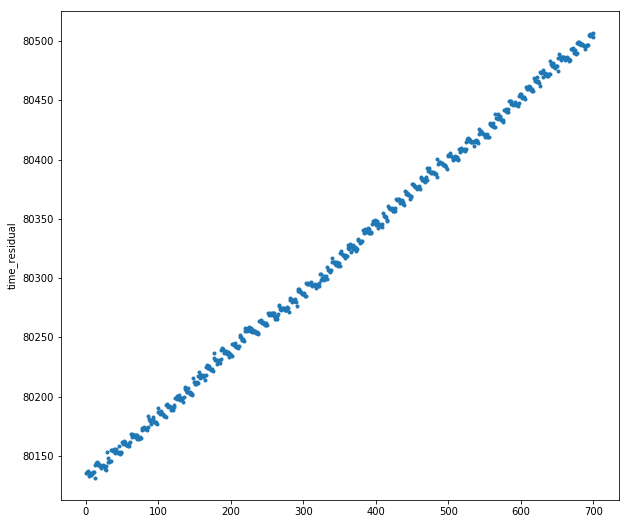

   direc: array([[7.98642351e-12]])
     fun: 6924.986249309943
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73289196)
200100.7328919627
time_res length 701
[7.8105785e+04 1.0000000e+01 5.0000000e+00]
[7.8105785e+04 1.0000000e+01 5.0000000e+00]
index_p 4


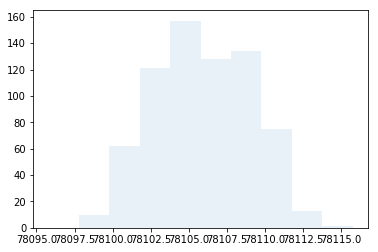

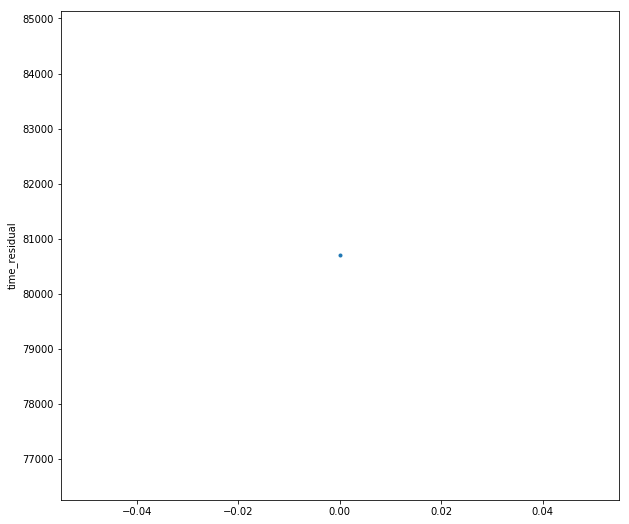

   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[8.397606e+04 1.000000e+01 5.000000e+00]
[8.397606e+04 1.000000e+01 5.000000e+00]
index_p 5


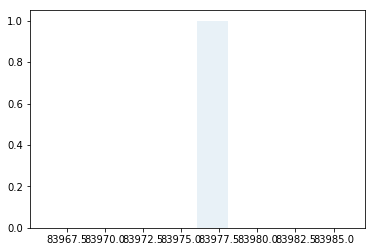

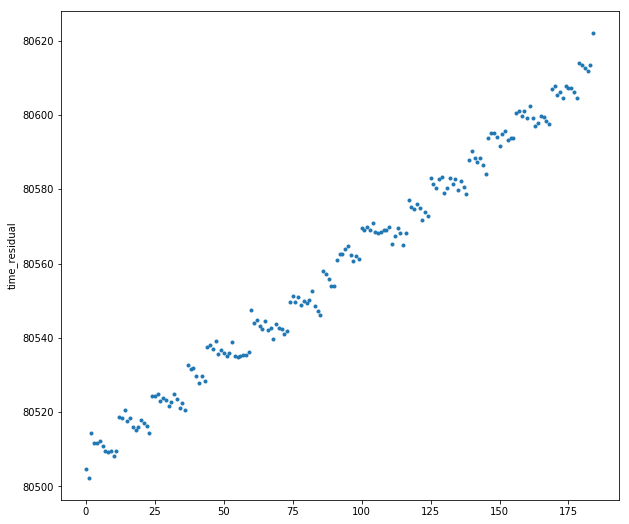

   direc: array([[1.]])
     fun: 1695.5224595146913
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array(200100.73287262)
200100.73287262104
time_res length 185
[7.81087287e+04 1.00000000e+01 5.00000000e+00]
[7.81087287e+04 1.00000000e+01 5.00000000e+00]
index_p 6


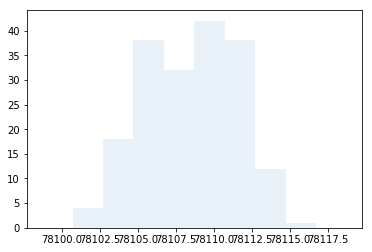

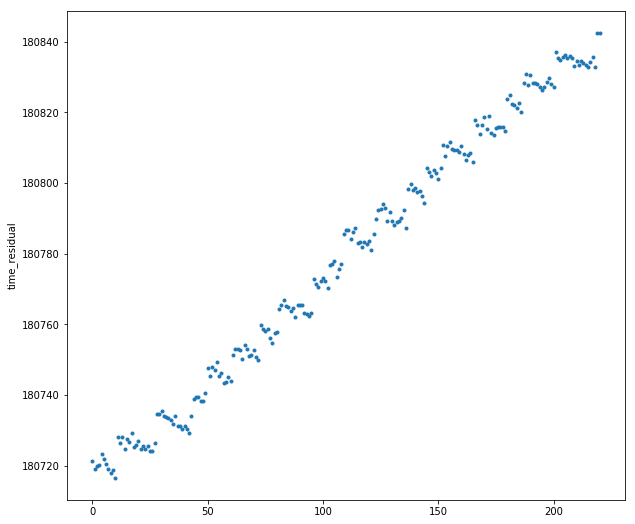

   direc: array([[1.]])
     fun: 2016.8407629459098
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 2
  status: 0
 success: True
       x: array(200100.73285819)
200100.73285819357
time_res length 221
[1.78210689e+05 1.00000000e+01 5.00000000e+00]
[1.78210689e+05 1.00000000e+01 5.00000000e+00]
index_p 7


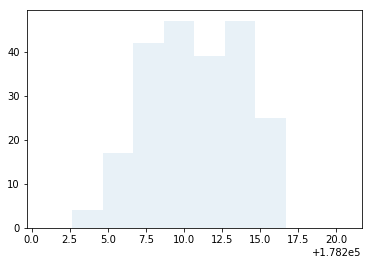

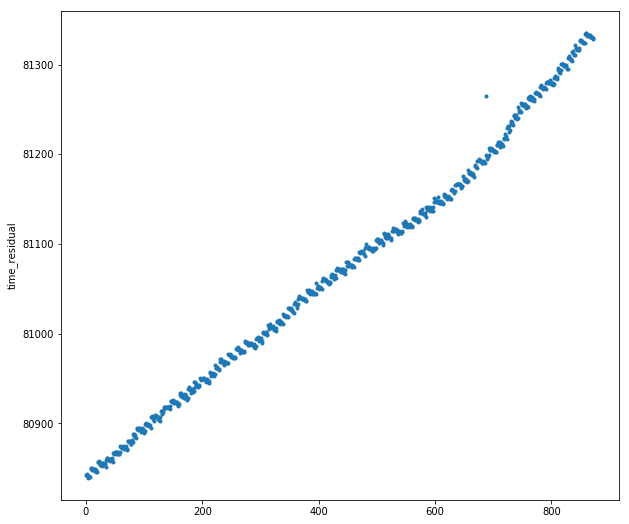

   direc: array([[8.3728647e-12]])
     fun: 13619.173806992769
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73287181)
200100.7328718083
time_res length 873
[7.82096582e+04 1.00000000e+01 5.00000000e+00]
[7.82096582e+04 1.00000000e+01 5.00000000e+00]
index_p 8


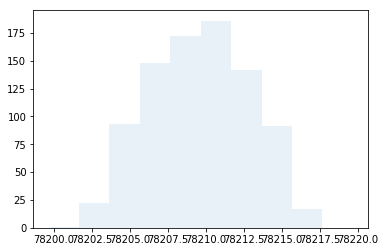

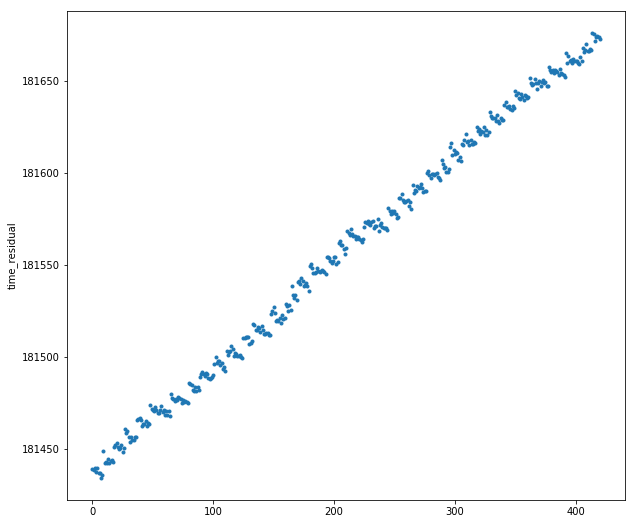

   direc: array([[7.32871088e-12]])
     fun: 4330.633469536193
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73287109)
200100.7328710883
time_res length 421
[1.78310461e+05 1.00000000e+01 5.00000000e+00]
[1.78310461e+05 1.00000000e+01 5.00000000e+00]
index_p 9


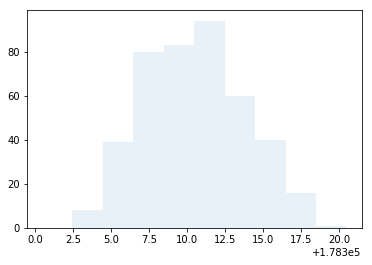

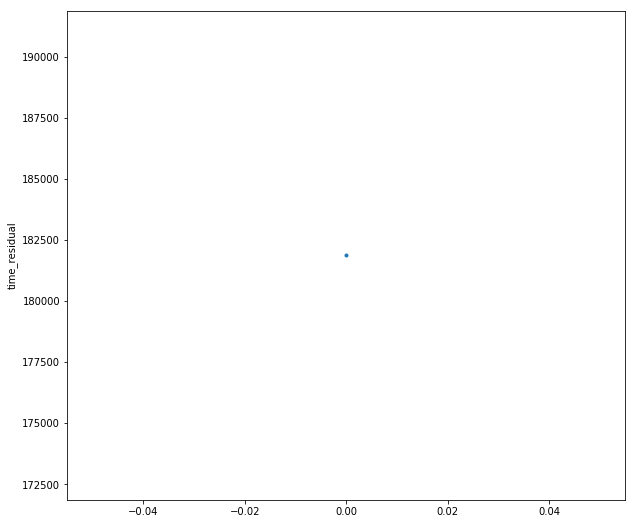

   direc: array([[1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 1
  status: 0
 success: True
       x: array(200102.58792896)
200102.58792896156
time_res length 1
[1.05757363e+05 1.00000000e+01 5.00000000e+00]
[1.05757363e+05 1.00000000e+01 5.00000000e+00]
index_p 10


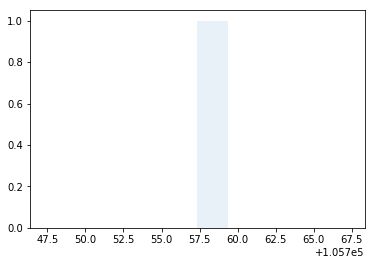

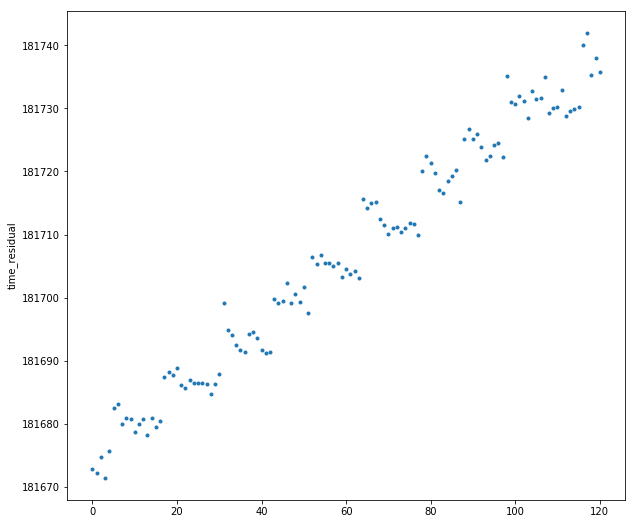

   direc: array([[7.87067501e-12]])
     fun: 1219.2267065424305
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
  status: 0
 success: True
       x: array(200100.73243403)
200100.73243403333
time_res length 121
[1.7837518e+05 1.0000000e+01 5.0000000e+00]
[1.7837518e+05 1.0000000e+01 5.0000000e+00]


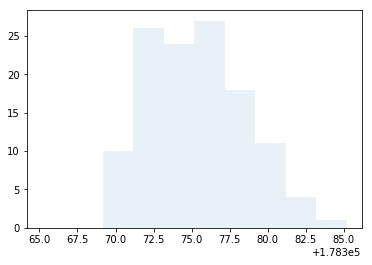

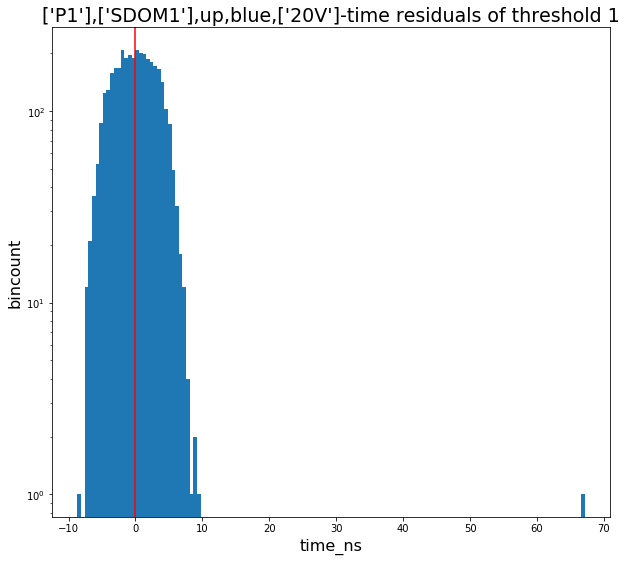

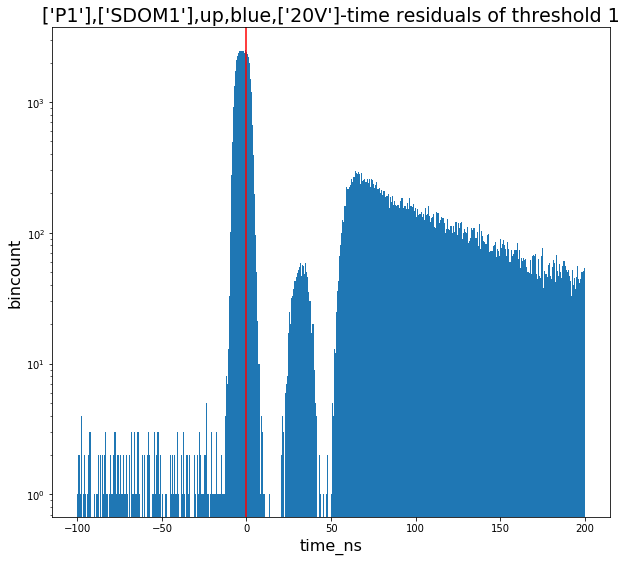

In [28]:
num_events, est_res_diff, peak_1 = res(90, 10)

In [ ]:
def CheckPeak():
    plt.figure(figsize=(10,9))
    for b in range(0, len(peak_1)):
        plt.figure(figsize=(10,9))
        n, bins, patches = plt.hist(peak_1[b], np.linspace(-100, 200, 100), alpha = 0.4, log = True)
        plt.axvline(color = 'r')
    plt.title(values + '-time residuals of threshold 1', fontsize = 19)
    plt.xlabel('time_ns', fontsize = 16)
    plt.ylabel('bincount', fontsize = 16)
    #plt.xlim(-100, 100)

<Figure size 720x648 with 0 Axes>

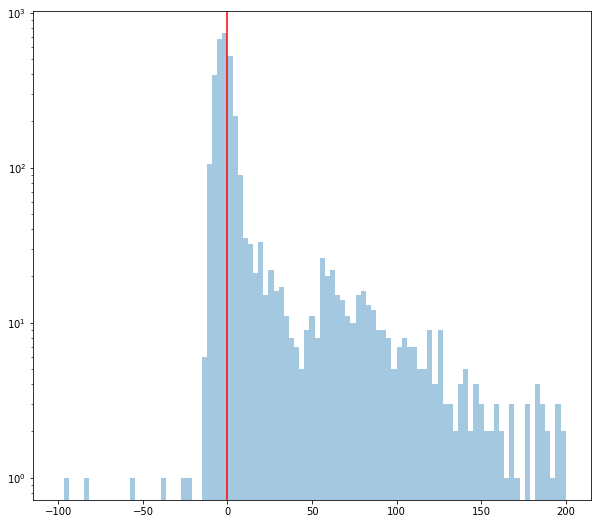

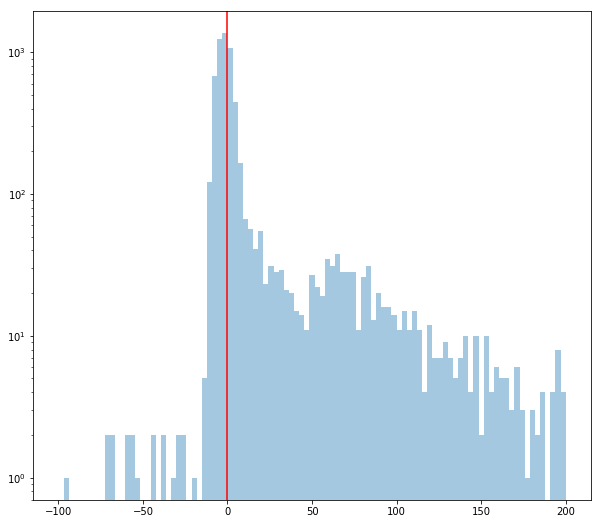

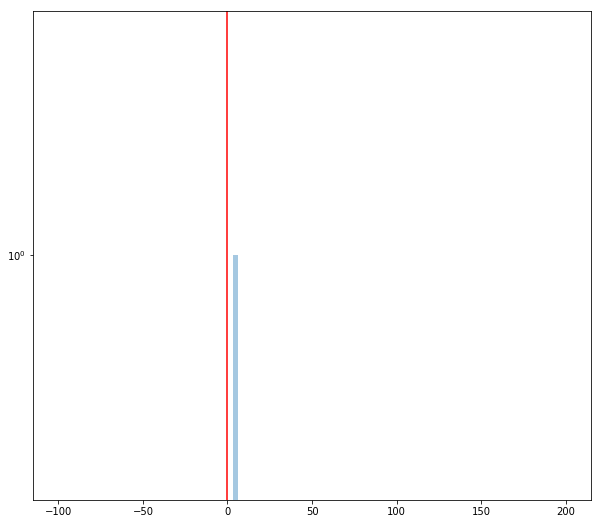

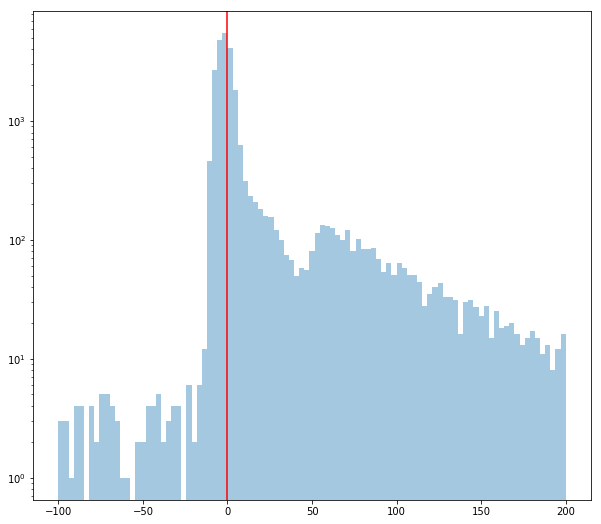

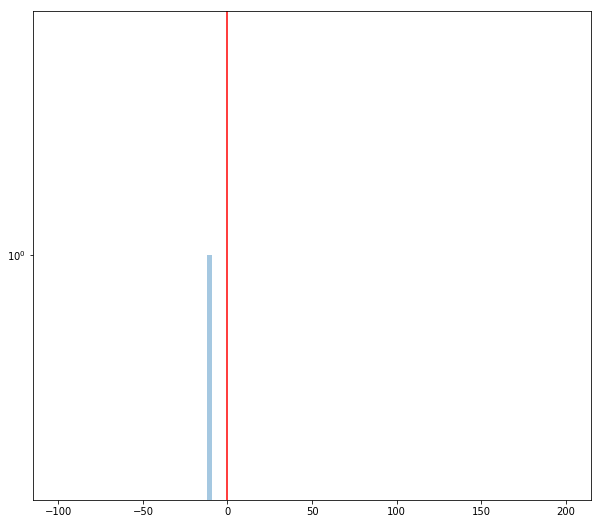

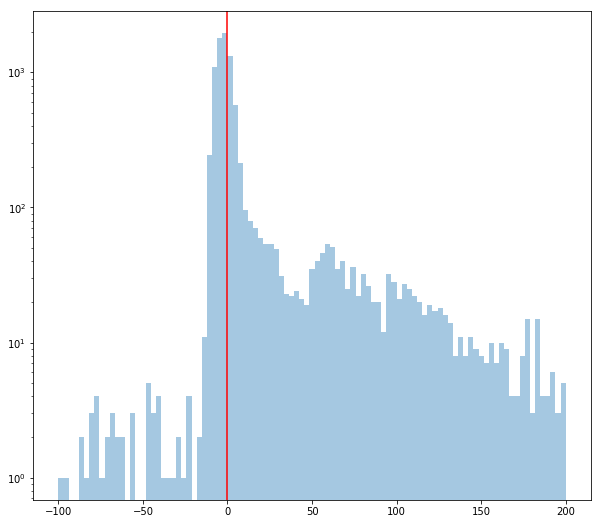

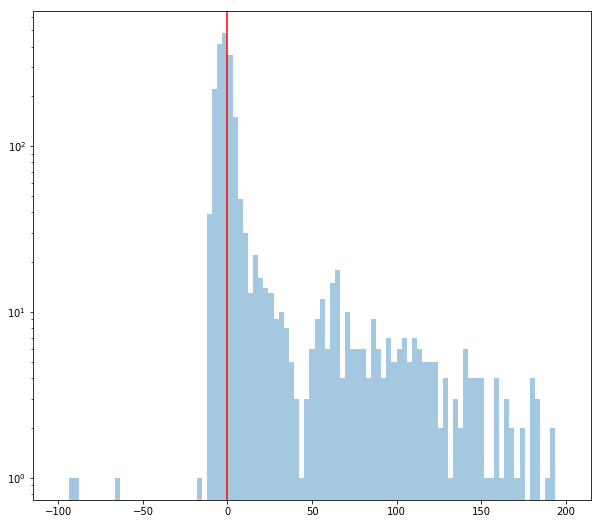

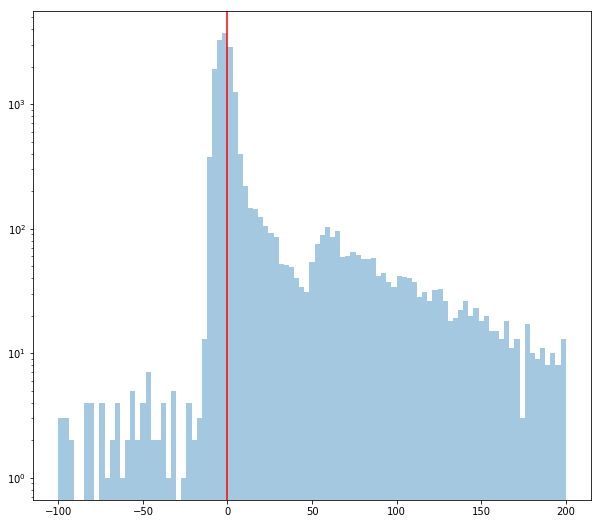

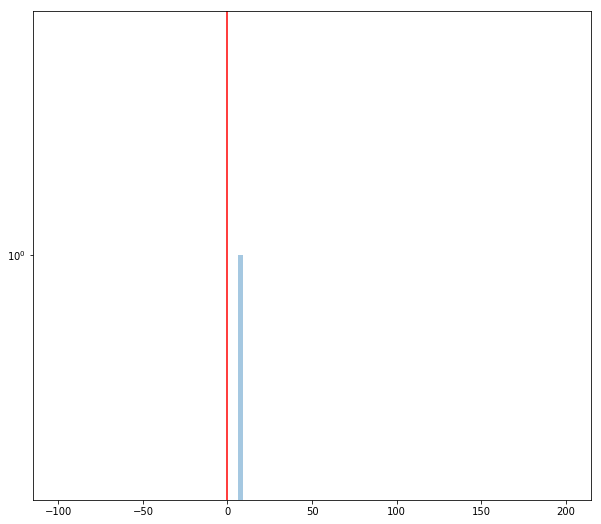

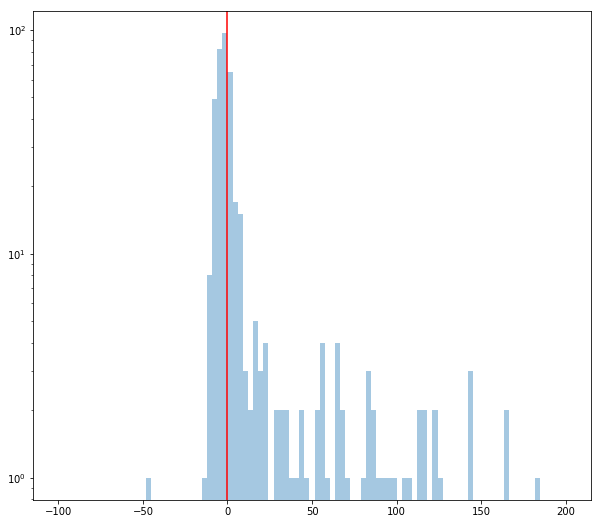

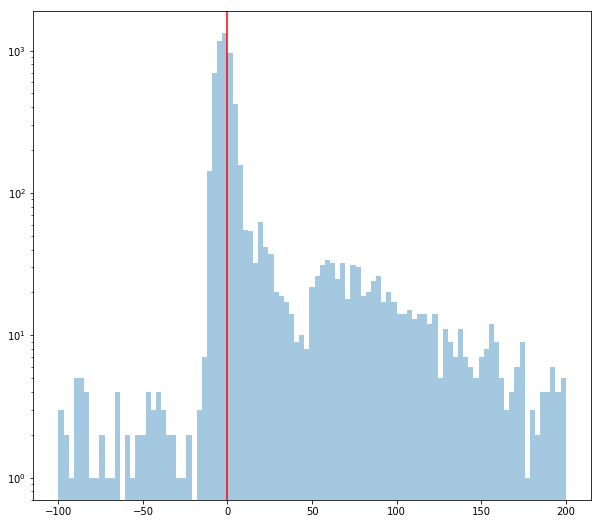

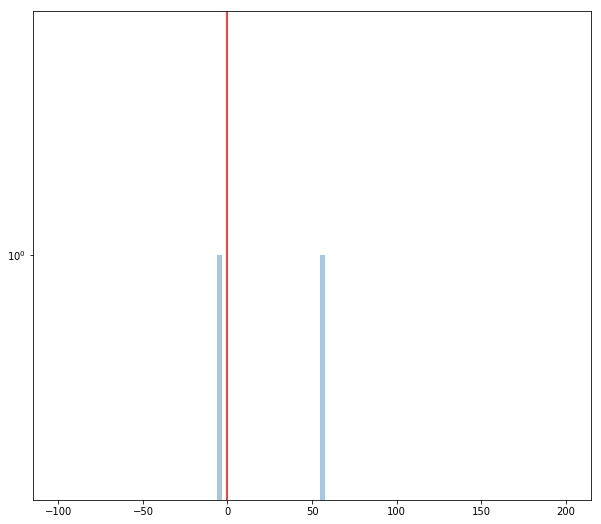

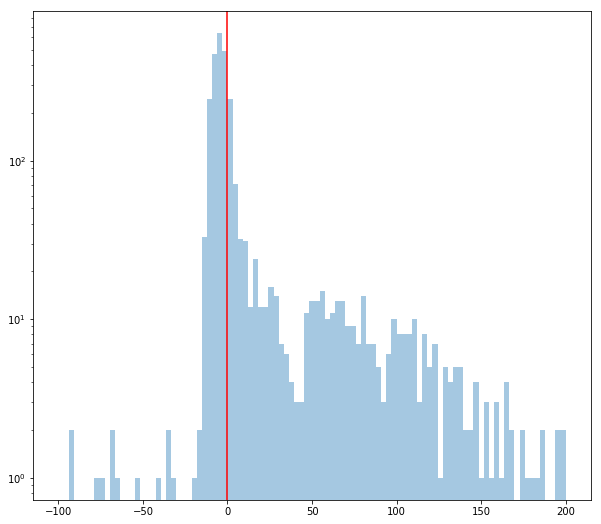

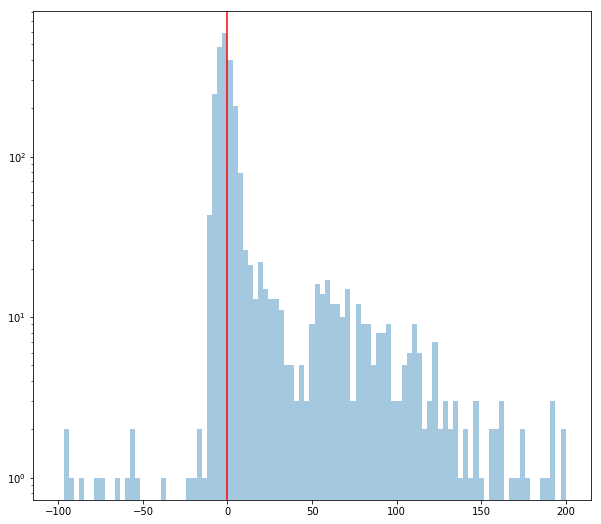

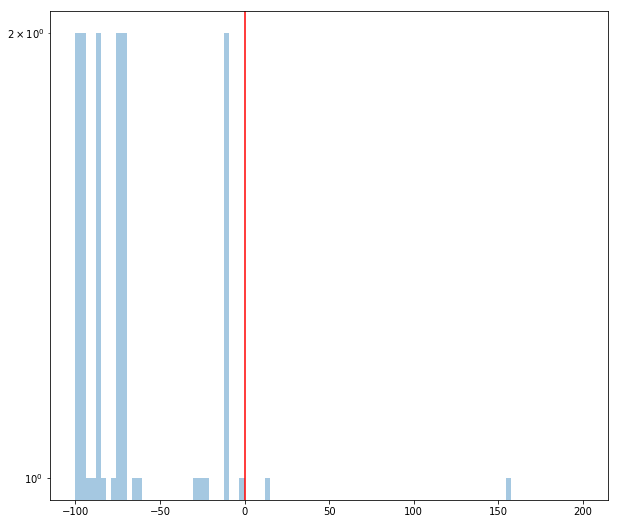

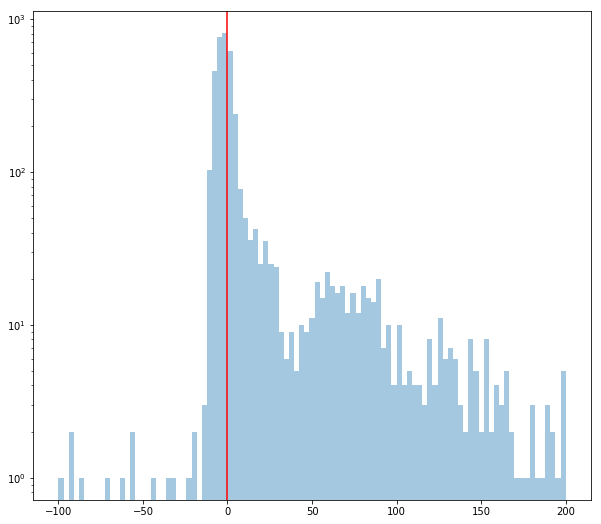

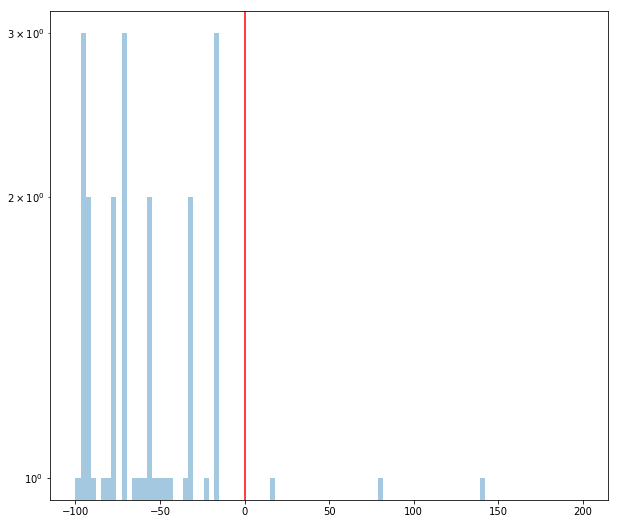

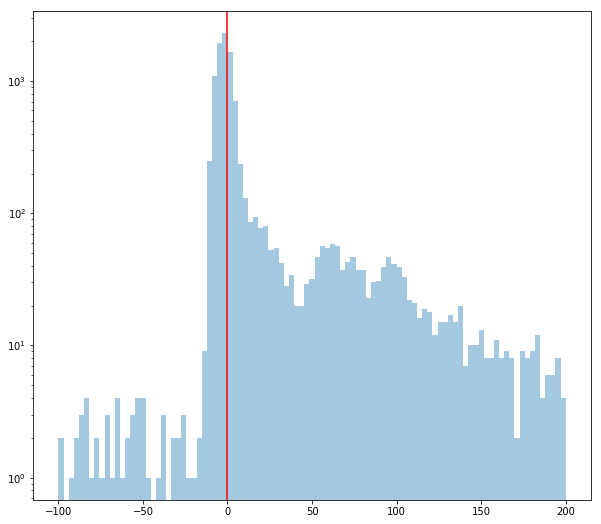

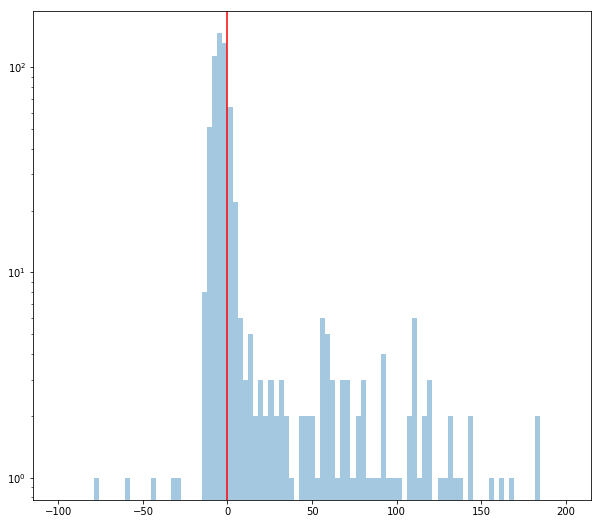

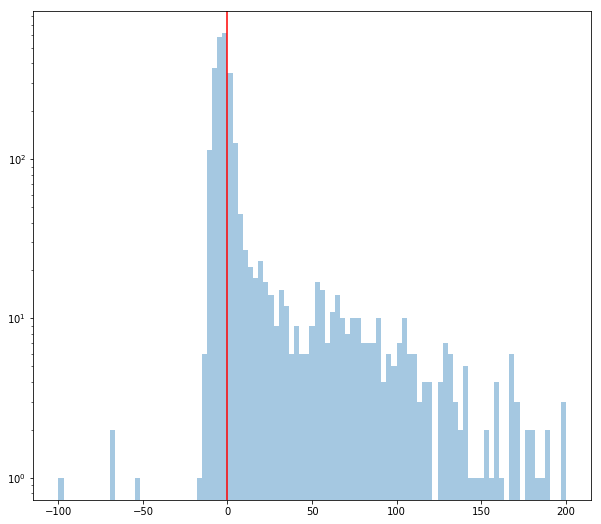

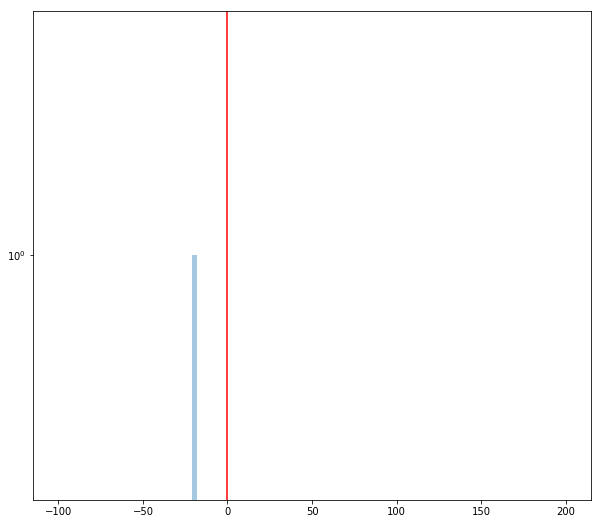

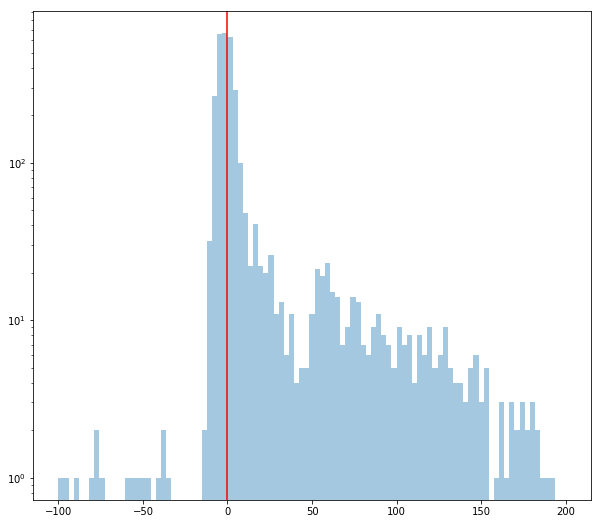

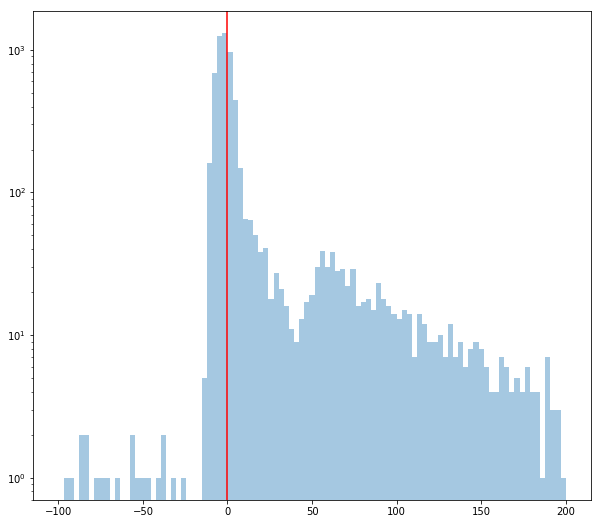

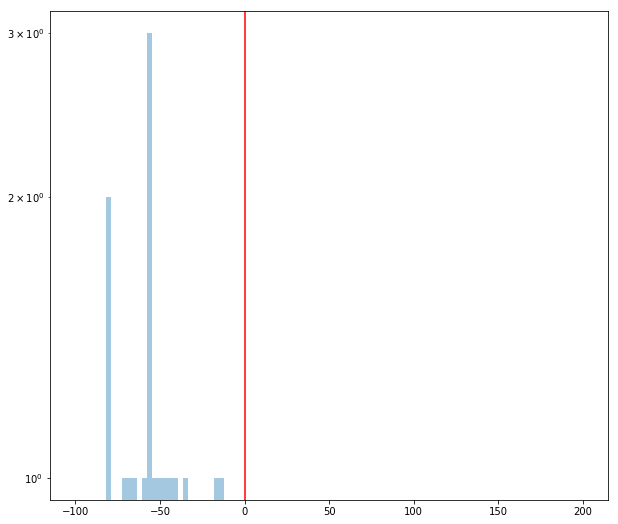

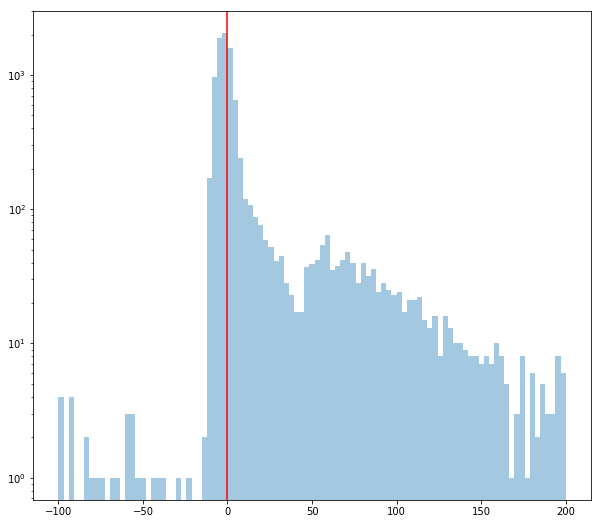

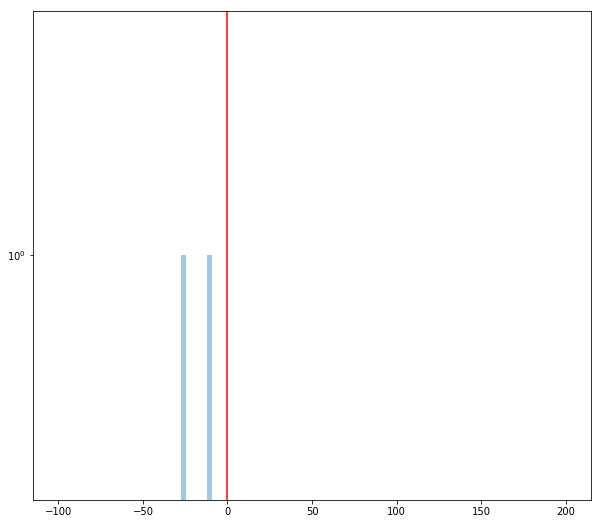

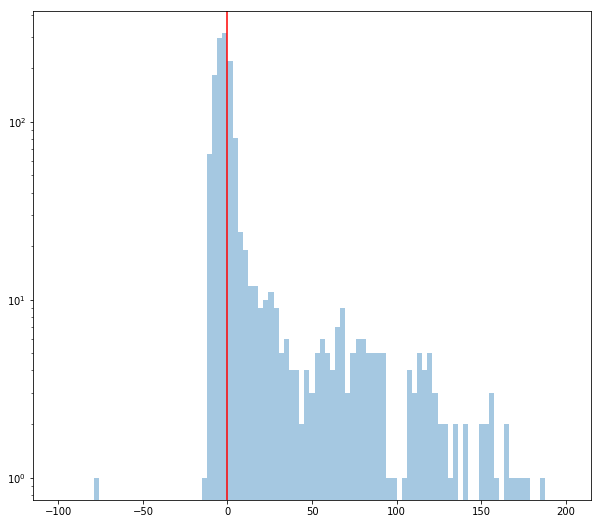

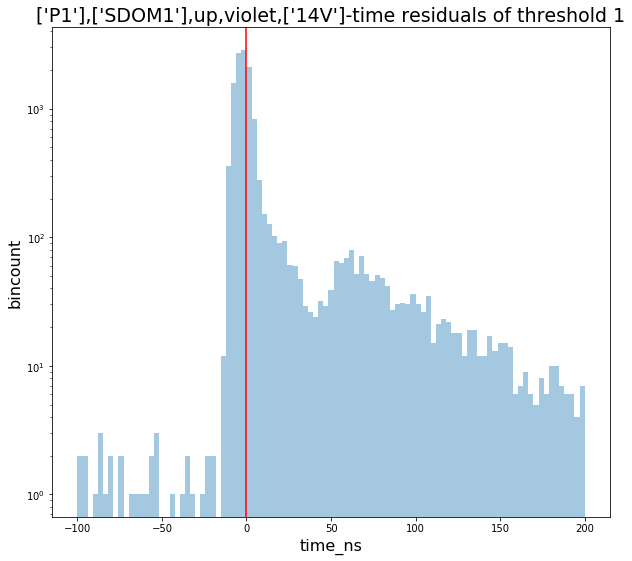

In [95]:
CheckPeak()